In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as pl
from scipy import stats
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})

In [4]:
df = pd.read_csv("./smaller.csv", parse_dates=True)

In [5]:
df.dtypes

medallion              object
hack_license           object
vendor_id              object
rate_code               int64
store_and_fwd_flag     object
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
trip_time_in_secs       int64
trip_distance         float64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
dtype: object

In [6]:
daily = df
daily["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])


In [7]:
daily = daily.set_index("pickup_datetime") # indexer le dataframe par une valeur 

In [8]:
daily["day_of_week"] = daily.index.weekday_name
daily["month_of_the_year"] = daily.index.month

In [10]:
daily.sample() #échantillon dans tout le data.frame

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,day_of_week,month_of_the_year
pickup_datetime,,,,,,,,,,,,,,,
2013-10-01 12:44:29,740BD5BE61840BE4FE3905CC3EBE3E7E,E48B185060FB0FF49BE6DA43E69E624B,CMT,1,N,2013-10-01 12:53:26,1,536,1.2,-73.974319,40.741859,-73.991150,40.742424,Tuesday,10
2013-10-02 19:44:55,EA05309C30F375695F44C96108ACB10F,1D10D8AC5B07D80861761365A05A9AE2,CMT,1,N,2013-10-02 20:03:55,1,1139,5.1,-73.981239,40.729141,-73.943695,40.719715,Wednesday,10
2013-10-02 22:01:18,EA05309C30F375695F44C96108ACB10F,1D10D8AC5B07D80861761365A05A9AE2,CMT,1,N,2013-10-02 22:09:18,1,480,2.2,-74.002991,40.733540,-74.005615,40.727261,Wednesday,10
2013-10-03 12:14:35,B36D7AB5B422EA1A0588EFD1D8155EF3,669F420B42A0739A5D1058184AD227ED,CMT,1,N,2013-10-03 12:26:04,1,689,0.9,-73.967178,40.766563,-73.976784,40.755947,Thursday,10
2013-10-02 00:33:37,28172009F5513B25F4091C0929C4515D,ABE08BCFEBF3F5F7339CA2170EEC1DEE,CMT,1,N,2013-10-02 01:06:16,1,1959,14.8,-73.784142,40.648621,-73.976479,40.672001,Wednesday,10
2013-10-03 18:35:17,90C0771FE30F703616B3A31414470E18,8D466661814D45936D897907D4B4C602,CMT,1,N,2013-10-03 18:37:36,1,138,0.7,-73.970169,40.789268,-73.979080,40.786839,Thursday,10
2013-10-03 13:32:57,37E1F5BD15A35A1652745C88604FC19E,4606384EA9F41F9BC76AA34B44FB5AAB,CMT,1,N,2013-10-03 14:00:44,1,1666,2.0,-73.955536,40.779690,-73.978142,40.763096,Thursday,10
2013-10-04 12:09:28,56EC8E3AA6218867A1341249F26531F3,DD72E3EE33F0CEDB5F068218010CC62A,CMT,1,N,2013-10-04 12:26:52,1,1044,4.7,-74.010162,40.719250,-73.984634,40.722439,Friday,10
2013-10-02 17:07:05,4E67DD5E52DAD3CC9F8C84132F96AD2D,B189EAD638D515A2DAD3CC8B268A3FEF,CMT,2,N,2013-10-02 18:04:13,1,3427,17.5,-73.992241,40.725040,-73.789650,40.647038,Wednesday,10


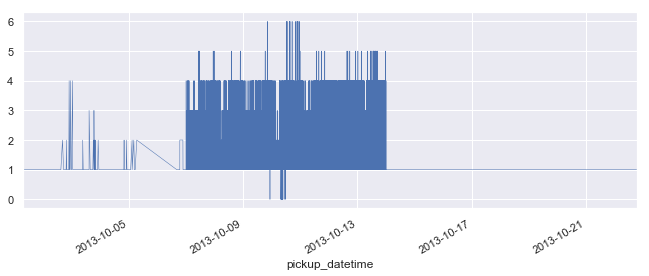

In [22]:
daily['passenger_count'].plot(linewidth=0.5)

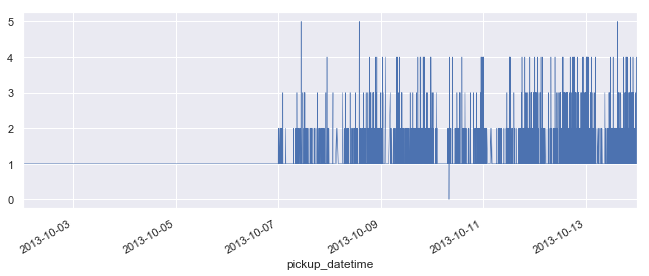

In [23]:
samp = daily.sample(5000)
samp['passenger_count'].plot(linewidth=0.5)

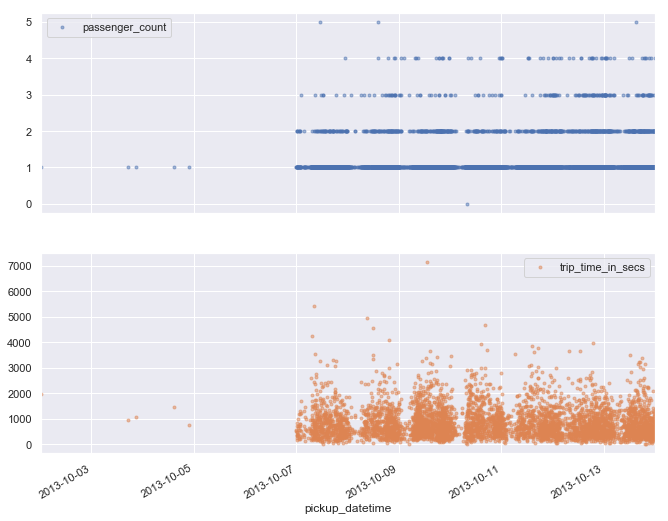

In [24]:
cols_plot = ['passenger_count', 'trip_time_in_secs']
axes = samp[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)

In [25]:
df["passenger_count"].count()

99999

In [26]:
df["passenger_count"].describe()

count    99999.000000
mean         1.236502
std          0.569327
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          6.000000
Name: passenger_count, dtype: float64

In [27]:
df["passenger_count"].max()

6

In [28]:
df["passenger_count"].min()

0

In [29]:
df["passenger_count"].std()

0.5693273867865031

In [30]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [31]:
d = {"toot": "toto"}

In [32]:
d


{'toot': 'toto'}

In [33]:
d = {[4,5]: "toto"}

TypeError: unhashable type: 'list'

In [ ]:
n = 0
n += 1

In [ ]:
n = n + 1

In [ ]:
d = []

In [ ]:
d= list()

In [ ]:
d = [None] * 5
d

In [ ]:
d = [1,3,2]
d.sort()

In [ ]:
d

In [ ]:
d.sort()

In [ ]:
d.reverse()

In [ ]:
d


In [ ]:
3 in d

In [ ]:
e = [3,5]


In [ ]:
d+e

In [ ]:
d.append(6
        )

In [ ]:
d

In [ ]:
d[1]

In [ ]:
d[0]

In [ ]:
d[-1]

In [ ]:
d[2:3]

In [ ]:
del d[2]


In [ ]:
d


In [ ]:
d =[3,4,5,5,5, 6,6, 3]

In [ ]:
list(set(d))

In [ ]:
s = "toto"
print(s.replace("o", "y"))
s

In [ ]:
s.lower()

In [ ]:
s.upper()

In [ ]:
s.title()

In [ ]:
s.startswith("t")

In [ ]:
s.endswith("o")

In [ ]:
counter = 0
for i in range(0, 5):
    counter = counter +1

In [ ]:
counter

In [ ]:
from collections import Counter

In [ ]:
c= Counter({
})

In [ ]:
for i in range(0,5):
    c[i]


In [ ]:
c

In [ ]:
%timeit [5 ** 10]


In [37]:
d = {}
d.update({"key": "value"})

In [38]:
d

{'key': 'value'}

In [39]:
d.update({"key2": "value2"})

In [40]:
d

{'key': 'value', 'key2': 'value2'}

In [41]:
for i in d:
    print(i)

key
key2


In [43]:
for k,v in d.items():
    print(k) # affiche les clés
    print(v) # affiche les valeurs

key
value
key2
value2


In [45]:
from enum import Enum
class Color(Enum):
    RED = 1
    BLUE = 2

In [47]:
Color.RED


<Color.RED: 1>

# Tests Unitaires


In [75]:
import pytest
from collections import Counter

l = ["danger"] * 4
r = ["zone"] * 5

def count():
    counters = Counter()
    for left, right in zip(l,r):
        counters.update({left, right})
    
    return counters
    
def test_count():
    c = count()
    assert c["danger"] == 4
    assert c["zone"] == 5

cours data-analysis with panda : https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/